In [12]:
import numpy as np

def heaviside(v):
    """ Heaviside Step function. """
    if v >= 0:
        return 1
    else:
        return 0
    
def perceptron(x, w, b):
    """ Function implemented by a perceptron with 
    weight vector w, bias b,Heaviside activation function """
    v = np.dot(w, x) + b
    y = heaviside(v)
    return y

def NOT_perceptron(x):
    return perceptron(x, w=-1, b=0.5)
# try to infer why it's w=-1, b=0.5

print("NOT(0) = {}".format(NOT_perceptron(0)))
print("NOT(1) = {}".format(NOT_perceptron(1)))

NOT(0) = 1
NOT(1) = 0


In [13]:
def AND_perceptron(x):
    w = np.array([1, 1])
    b = -1.5
    return perceptron(x, w, b)

# Test
example1 = np.array([0, 0])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([1, 1])


print("AND({}, {}) = {}".format(example1[0], example1[1], AND_perceptron(example1)))
print("AND({}, {}) = {}".format(example2[0], example2[1], AND_perceptron(example2)))
print("AND({}, {}) = {}".format(example3[0], example3[1], AND_perceptron(example3)))
print("AND({}, {}) = {}".format(example4[0], example4[1], AND_perceptron(example4)))

AND(0, 0) = 0
AND(1, 0) = 0
AND(0, 1) = 0
AND(1, 1) = 1


In [14]:
def OR_perceptron(x):
    w = np.array([1, 1])
    b = -0.5
    return perceptron(x, w, b)

# Test
example1 = np.array([0, 0])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([1, 1])

print("OR({}, {}) = {}".format(example1[0], example1[1], OR_perceptron(example1)))
print("OR({}, {}) = {}".format(example2[0], example2[1], OR_perceptron(example2)))
print("OR({}, {}) = {}".format(example3[0], example3[1], OR_perceptron(example3)))
print("OR({}, {}) = {}".format(example4[0], example4[1], OR_perceptron(example4)))

OR(0, 0) = 0
OR(1, 0) = 1
OR(0, 1) = 1
OR(1, 1) = 1


In [15]:
def XOR_net(x):
    gate_1 = AND_perceptron(x)
    gate_2 = NOT_perceptron(gate_1)
    gate_3 = OR_perceptron(x)
    gate_4 = np.array([gate_2, gate_3])
    output = AND_perceptron(gate_4)
    return output

#Test
example1 = np.array([0, 0])
example2 = np.array([1, 0])
example3 = np.array([0, 1])
example4 = np.array([1, 1])

print("OR({}, {}) = {}".format(example1[0], example1[1], XOR_net(example1)))
print("OR({}, {}) = {}".format(example2[0], example2[1], XOR_net(example2)))
print("OR({}, {}) = {}".format(example3[0], example3[1], XOR_net(example3)))
print("OR({}, {}) = {}".format(example4[0], example4[1], XOR_net(example4)))

OR(0, 0) = 0
OR(1, 0) = 1
OR(0, 1) = 1
OR(1, 1) = 0


In [16]:
import numpy as np

def sigmoid(x):
  # the activation function: phi(x) = 1 / (1 + exp(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0.1, 1]) # w1 = 0.1, w2 = 1
bias = 4                   # b = 0
n = Neuron(weights, bias)

x = np.array([1,2])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994

0.9977621514787236


In [20]:
import numpy as np


class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (a11, a12)
    - an output layer with 1 neuron (a2)
  Each neuron has the same weights and bias:
    - w = [0.1, 1]
    - b = 0.1
  '''
  def __init__(self):
    weights = np.array([0.1, 1])
    bias = 0.1

    # The Neuron class here is from the previous section
    self.a11 = Neuron(weights, bias)
    self.a12 = Neuron(weights, bias)
    self.a2 = Neuron(weights, bias)

  def feedforward(self, x):
    out_a11 = self.a11.feedforward(x)
    out_a12 = self.a12.feedforward(x)

    # The inputs for a2 are the outputs from a11 and a12
  import numpy as np


class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (a11, a12)
    - an output layer with 1 neuron (a2)
  Each neuron has the same weights and bias:
    - w = [0.1, 1]
    - b = 0.1
  '''
  def __init__(self):
    weights = np.array([0.1, 1])
    bias = 0.1

    # The Neuron class here is from the previous section
    self.a11 = Neuron(weights, bias)
    self.a12 = Neuron(weights, bias)
    self.a2 = Neuron(weights, bias)

  def feedforward(self, x):
    out_a11 = self.a11.feedforward(x)
    out_a12 = self.a12.feedforward(x)

    # The inputs for a2 are the outputs from a11 and a12
    out_a2 = self.a2.feedforward(np.array([out_a11, out_a12]))

    return out_a2

network = OurNeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x)) # 0.7614910697028644  out_a2 = self.a2.feedforward(np.array([out_a11, out_a12]))

0.7614910697028644


In [21]:
import numpy as np

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

# Test
y_true = np.array([1, 0, 0, 1]) # want to have
y_pred = np.array([0, 0, 0, 0]) # what we actually get

print(mse_loss(y_true, y_pred)) # 0.5

0.5


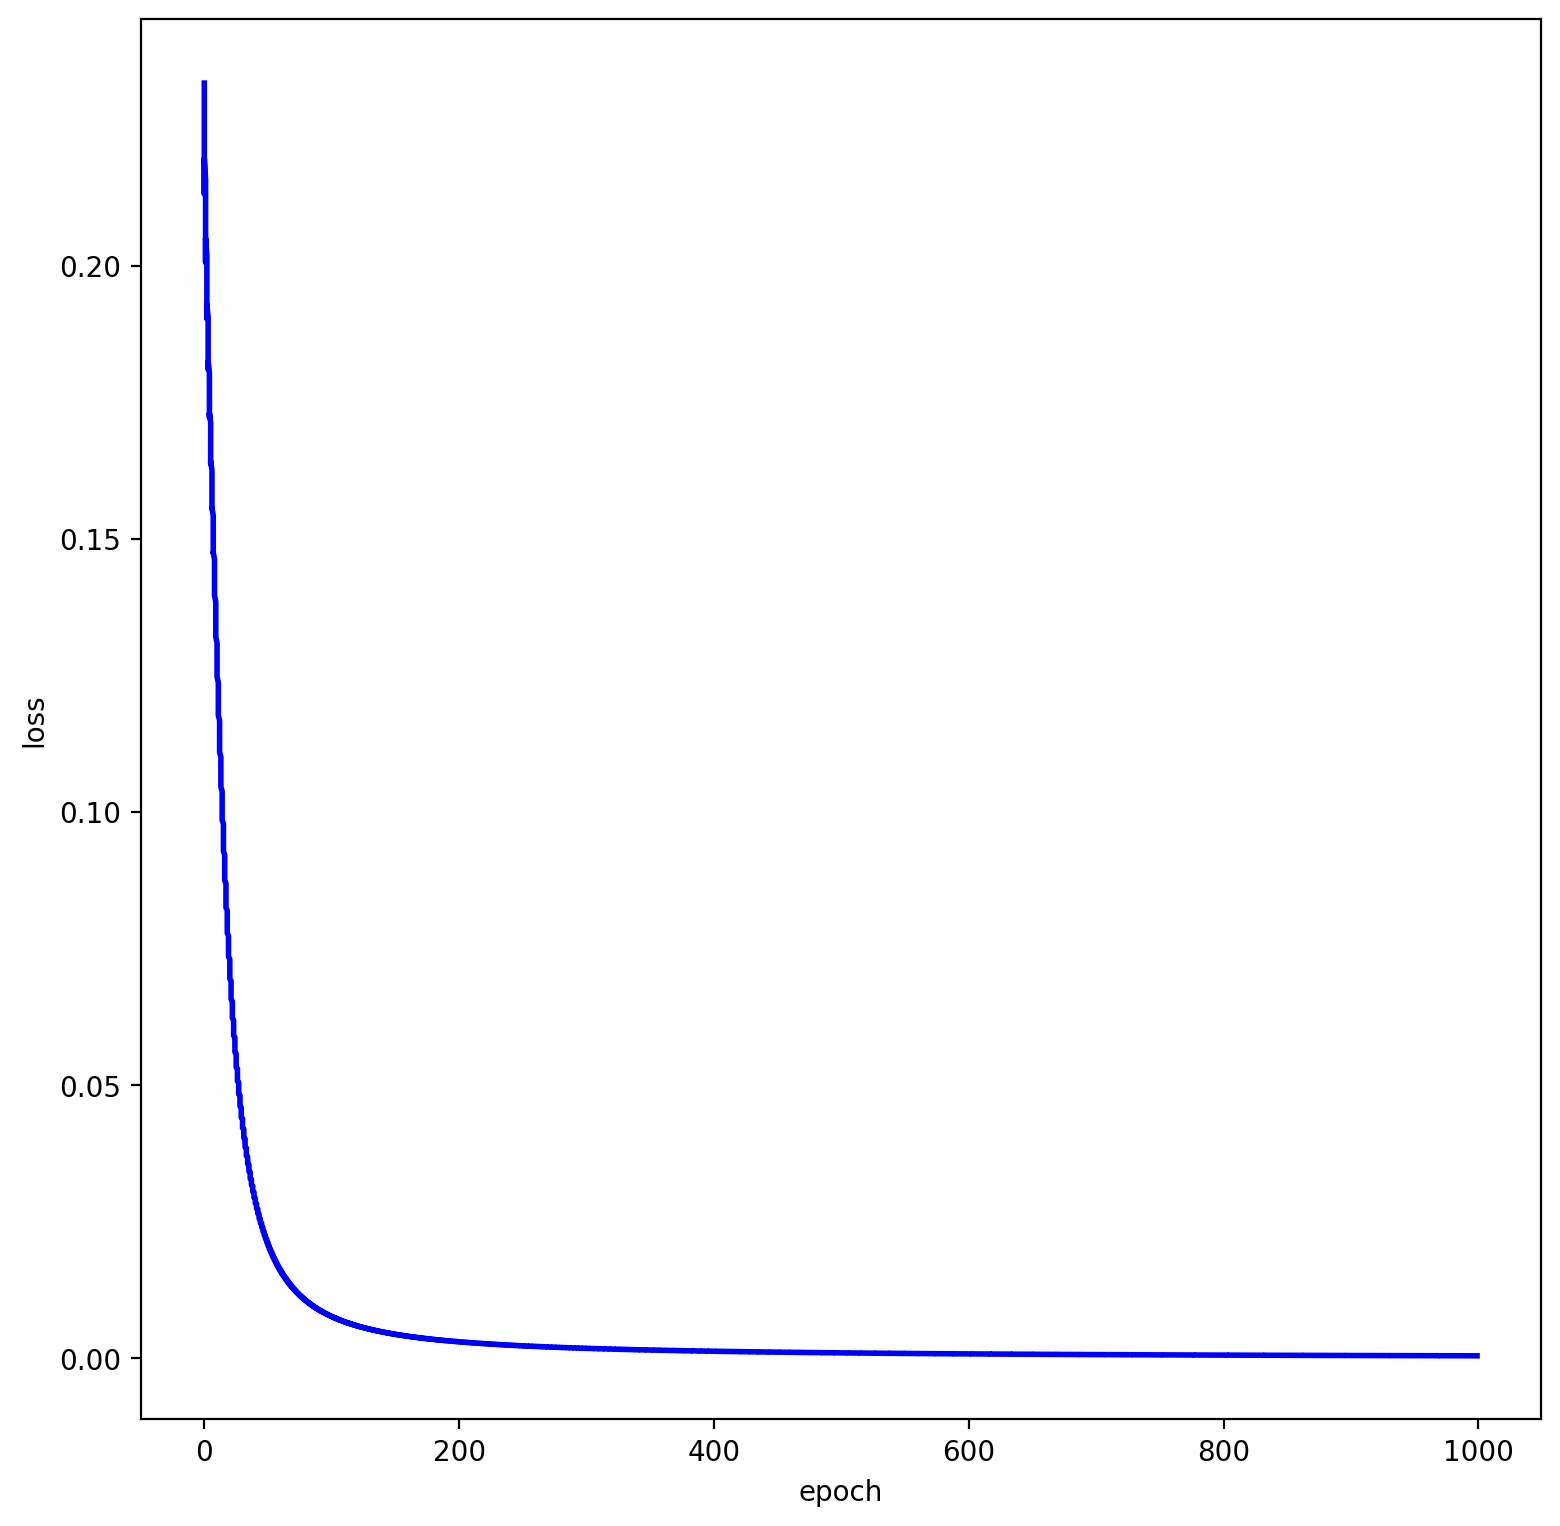

In [22]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'



def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (a11, a12)
    - an output layer with 1 neuron (a2)
  '''
  def __init__(self):
    # Weights
    self.w111 = np.random.normal()
    self.w112 = np.random.normal()
    self.w121 = np.random.normal()
    self.w122 = np.random.normal()
    self.w211 = np.random.normal()
    self.w212 = np.random.normal()

    # Biases
    self.b11 = np.random.normal()
    self.b12 = np.random.normal()
    self.b2 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    a11 = sigmoid(self.w111 * x[0] + self.w112 * x[1] + self.b11)
    a12 = sigmoid(self.w121 * x[0] + self.w122 * x[1] + self.b12)
    a2 = sigmoid(self.w211 * a11 + self.w212 * a12 + self.b2)
    return a2

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset
    epoch_vector=[]
    loss_vector=[]

    # the gradient descent algorithm
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_a11 = self.w111 * x[0] + self.w112 * x[1] + self.b11
        a11 = sigmoid(sum_a11)

        sum_a12 = self.w121 * x[0] + self.w122 * x[1] + self.b12
        a12 = sigmoid(sum_a12)

        sum_a2 = self.w211 * a11 + self.w212 * a12 + self.b2
        a2 = sigmoid(sum_a2)
        y_pred = a2

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron a2
        d_ypred_d_w211 = a11 * deriv_sigmoid(sum_a2) # dy/dw to know how to change the weights w for a given difference in y
        d_ypred_d_w212 = a12 * deriv_sigmoid(sum_a2)
        d_ypred_d_b2 = deriv_sigmoid(sum_a2)

        d_ypred_d_a11 = self.w211 * deriv_sigmoid(sum_a2)
        d_ypred_d_a12 = self.w212 * deriv_sigmoid(sum_a2)

        # Neuron a11
        d_a11_d_w111 = x[0] * deriv_sigmoid(sum_a11)
        d_a11_d_w112 = x[1] * deriv_sigmoid(sum_a11)
        d_a11_d_b11 = deriv_sigmoid(sum_a11)

        # Neuron a12
        d_a12_d_w121 = x[0] * deriv_sigmoid(sum_a12)
        d_a12_d_w122 = x[1] * deriv_sigmoid(sum_a12)
        d_a12_d_b12 = deriv_sigmoid(sum_a12)

        # --- Update weights and biases
        # Neuron a11
        self.w111 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w111
        self.w112 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w112
        self.b11 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_b11

        # Neuron a12
        self.w121 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w121
        self.w122 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w122
        self.b12 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_b12

        # Neuron a2
        self.w211 -= learn_rate * d_L_d_ypred * d_ypred_d_w211
        self.w212 -= learn_rate * d_L_d_ypred * d_ypred_d_w212
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_b2

      # --- Calculate total loss at the end of each epoch
      #if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        #print("Epoch %d loss: %.3f" % (epoch, loss))
        epoch_vector.append(epoch)
        loss_vector.append(loss)
        
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(epoch_vector,loss_vector, '-b', lw=2)
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    plt.show()
      
    
# Define dataset of period and amplitude
data = np.array([
  [0.9, 0.5],  
  [1.1, 0.55],
  [1.2, 0.65],   
  [1.1, 0.5], 
  [1.0, 0.65], 
  [1.1, 0.45],
  [1.1, 0.75],#6.5
  [10.5, 0.5],
  [13.4, 0.4],
  [11.14, 0.54],
  [11.49, 0.45],
  [13.4, 0.4],    
  [27.2, 0.65],
])
all_y_trues = np.array([
  1, # RRL
  1, # RRL    
  1, # RRL
  1, # RRL  
  1, # RRL    
  1, # RRL
  1, # RRL      
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
])



# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

In [23]:
# Make some predictions
source_1 = np.array([1.1, 0.4]) 
source_2 = np.array([20.3, 0.7]) 
print("probabilities of sources being RRL stars")
print("source_1: %.3f" % network.feedforward(source_1)) # likely RRL
print("source_2: %.3f" % network.feedforward(source_2)) # unlikely RRL (thus Cepheid)

probabilities of sources being RRL stars
source_1: 0.976
source_2: 0.021


# Trying out

1. Mislabel a training example

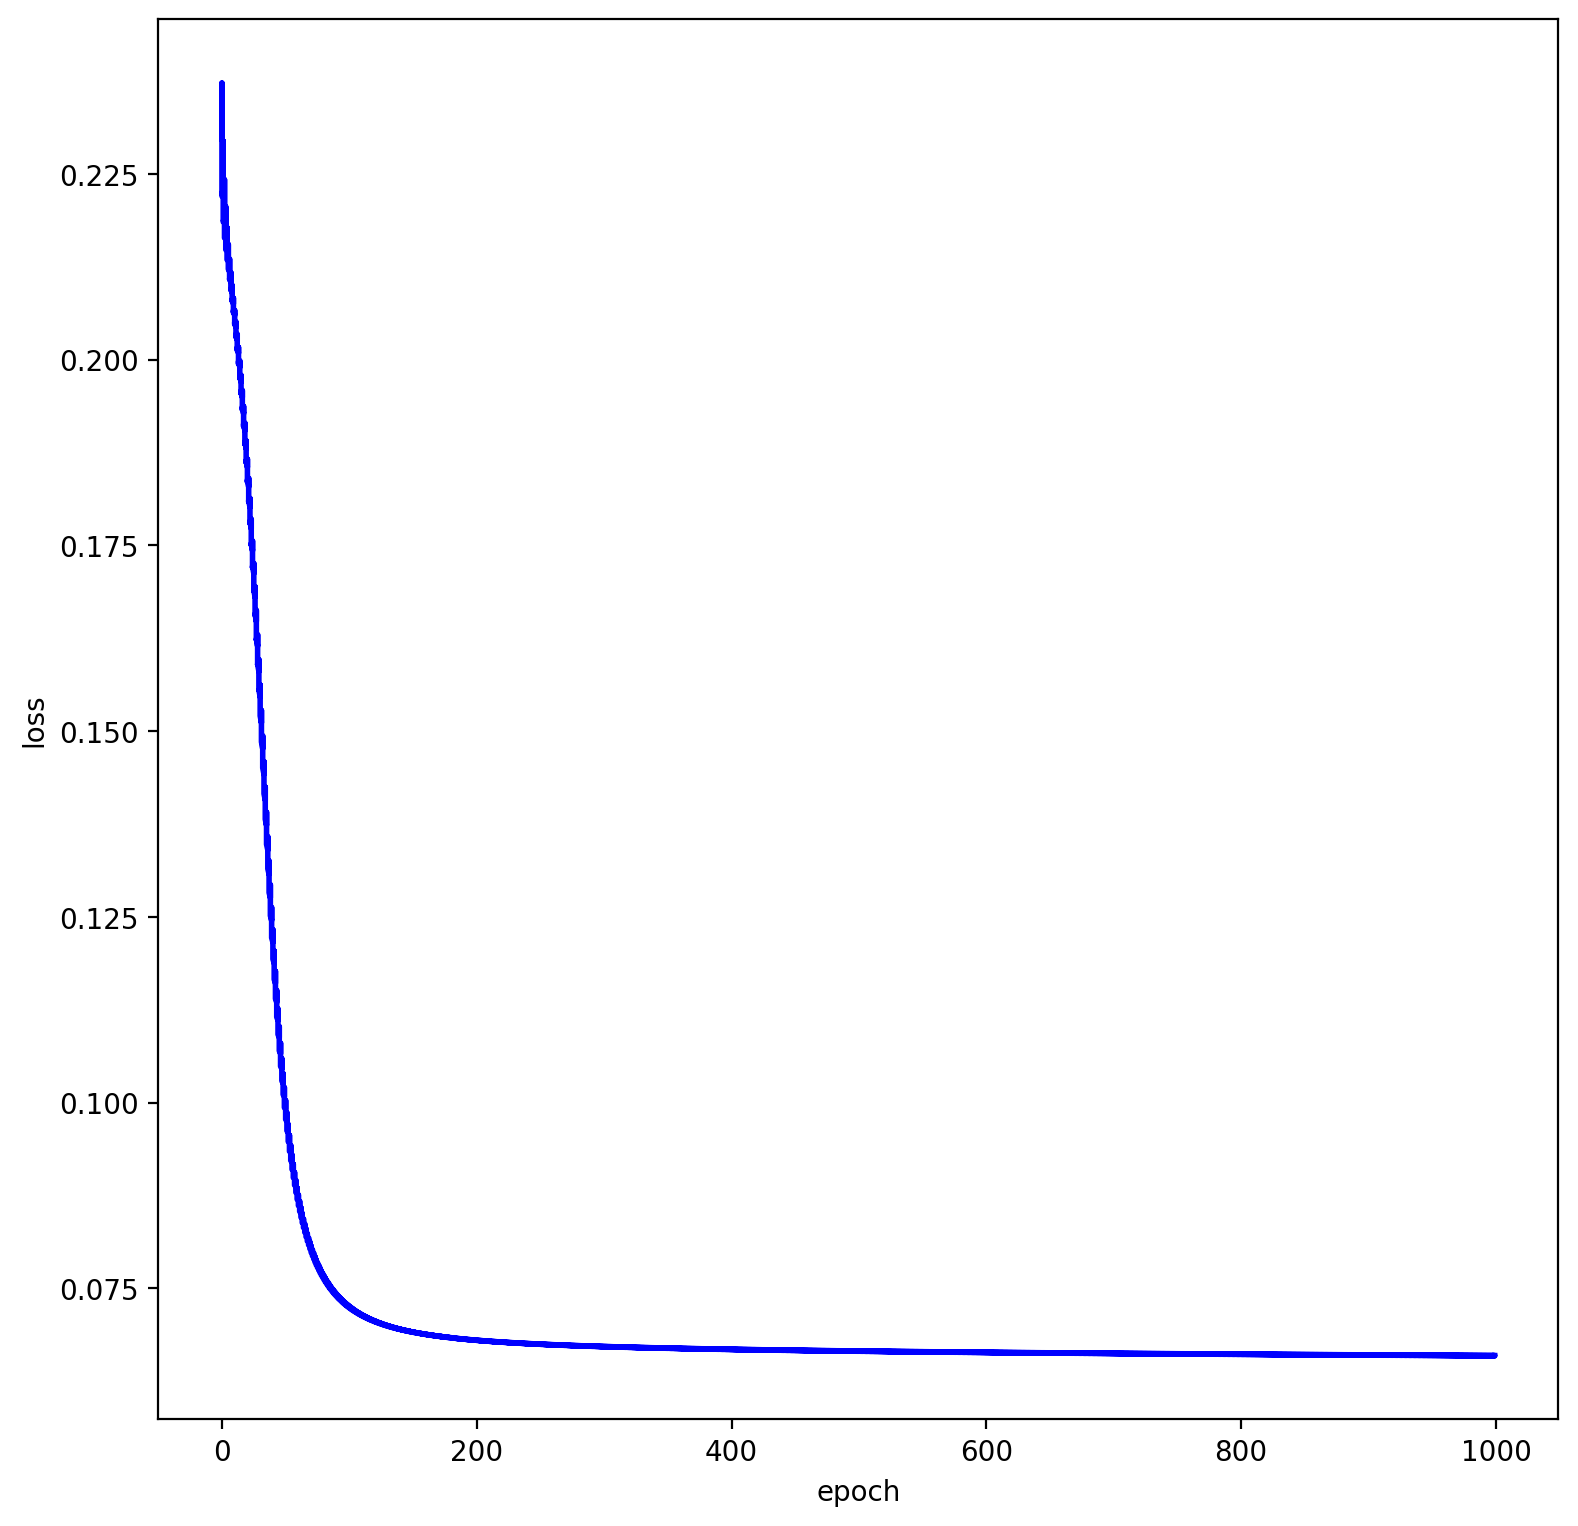

In [24]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'



def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (a11, a12)
    - an output layer with 1 neuron (a2)
  '''
  def __init__(self):
    # Weights
    self.w111 = np.random.normal()
    self.w112 = np.random.normal()
    self.w121 = np.random.normal()
    self.w122 = np.random.normal()
    self.w211 = np.random.normal()
    self.w212 = np.random.normal()

    # Biases
    self.b11 = np.random.normal()
    self.b12 = np.random.normal()
    self.b2 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    a11 = sigmoid(self.w111 * x[0] + self.w112 * x[1] + self.b11)
    a12 = sigmoid(self.w121 * x[0] + self.w122 * x[1] + self.b12)
    a2 = sigmoid(self.w211 * a11 + self.w212 * a12 + self.b2)
    return a2

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset
    epoch_vector=[]
    loss_vector=[]

    # the gradient descent algorithm
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_a11 = self.w111 * x[0] + self.w112 * x[1] + self.b11
        a11 = sigmoid(sum_a11)

        sum_a12 = self.w121 * x[0] + self.w122 * x[1] + self.b12
        a12 = sigmoid(sum_a12)

        sum_a2 = self.w211 * a11 + self.w212 * a12 + self.b2
        a2 = sigmoid(sum_a2)
        y_pred = a2

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron a2
        d_ypred_d_w211 = a11 * deriv_sigmoid(sum_a2) # dy/dw to know how to change the weights w for a given difference in y
        d_ypred_d_w212 = a12 * deriv_sigmoid(sum_a2)
        d_ypred_d_b2 = deriv_sigmoid(sum_a2)

        d_ypred_d_a11 = self.w211 * deriv_sigmoid(sum_a2)
        d_ypred_d_a12 = self.w212 * deriv_sigmoid(sum_a2)

        # Neuron a11
        d_a11_d_w111 = x[0] * deriv_sigmoid(sum_a11)
        d_a11_d_w112 = x[1] * deriv_sigmoid(sum_a11)
        d_a11_d_b11 = deriv_sigmoid(sum_a11)

        # Neuron a12
        d_a12_d_w121 = x[0] * deriv_sigmoid(sum_a12)
        d_a12_d_w122 = x[1] * deriv_sigmoid(sum_a12)
        d_a12_d_b12 = deriv_sigmoid(sum_a12)

        # --- Update weights and biases
        # Neuron a11
        self.w111 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w111
        self.w112 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w112
        self.b11 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_b11

        # Neuron a12
        self.w121 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w121
        self.w122 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w122
        self.b12 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_b12

        # Neuron a2
        self.w211 -= learn_rate * d_L_d_ypred * d_ypred_d_w211
        self.w212 -= learn_rate * d_L_d_ypred * d_ypred_d_w212
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_b2

      # --- Calculate total loss at the end of each epoch
      #if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        #print("Epoch %d loss: %.3f" % (epoch, loss))
        epoch_vector.append(epoch)
        loss_vector.append(loss)
        
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(epoch_vector,loss_vector, '-b', lw=2)
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    plt.show()
      
    
# Define dataset of period and amplitude
data = np.array([
  [0.9, 0.5],  
  [1.1, 0.55],
  [1.2, 0.65],   
  [1.1, 0.5], 
  [1.0, 0.65], 
  [1.1, 0.45],
  [1.1, 0.75],#6.5
  [10.5, 0.5],
  [13.4, 0.4],
  [11.14, 0.54],
  [11.49, 0.45],
  [13.4, 0.4],    
  [27.2, 0.65],
])
all_y_trues = np.array([
  1,  # correct
  0,  # WRONG! should be 1
  1, 1, 1, 1, 1,
  0, 0, 0, 0, 0, 0
])


# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

As expected the Training loss is not going down as smoothly.

2. Training longer or shorter

when traning is shorter, epoch = 500

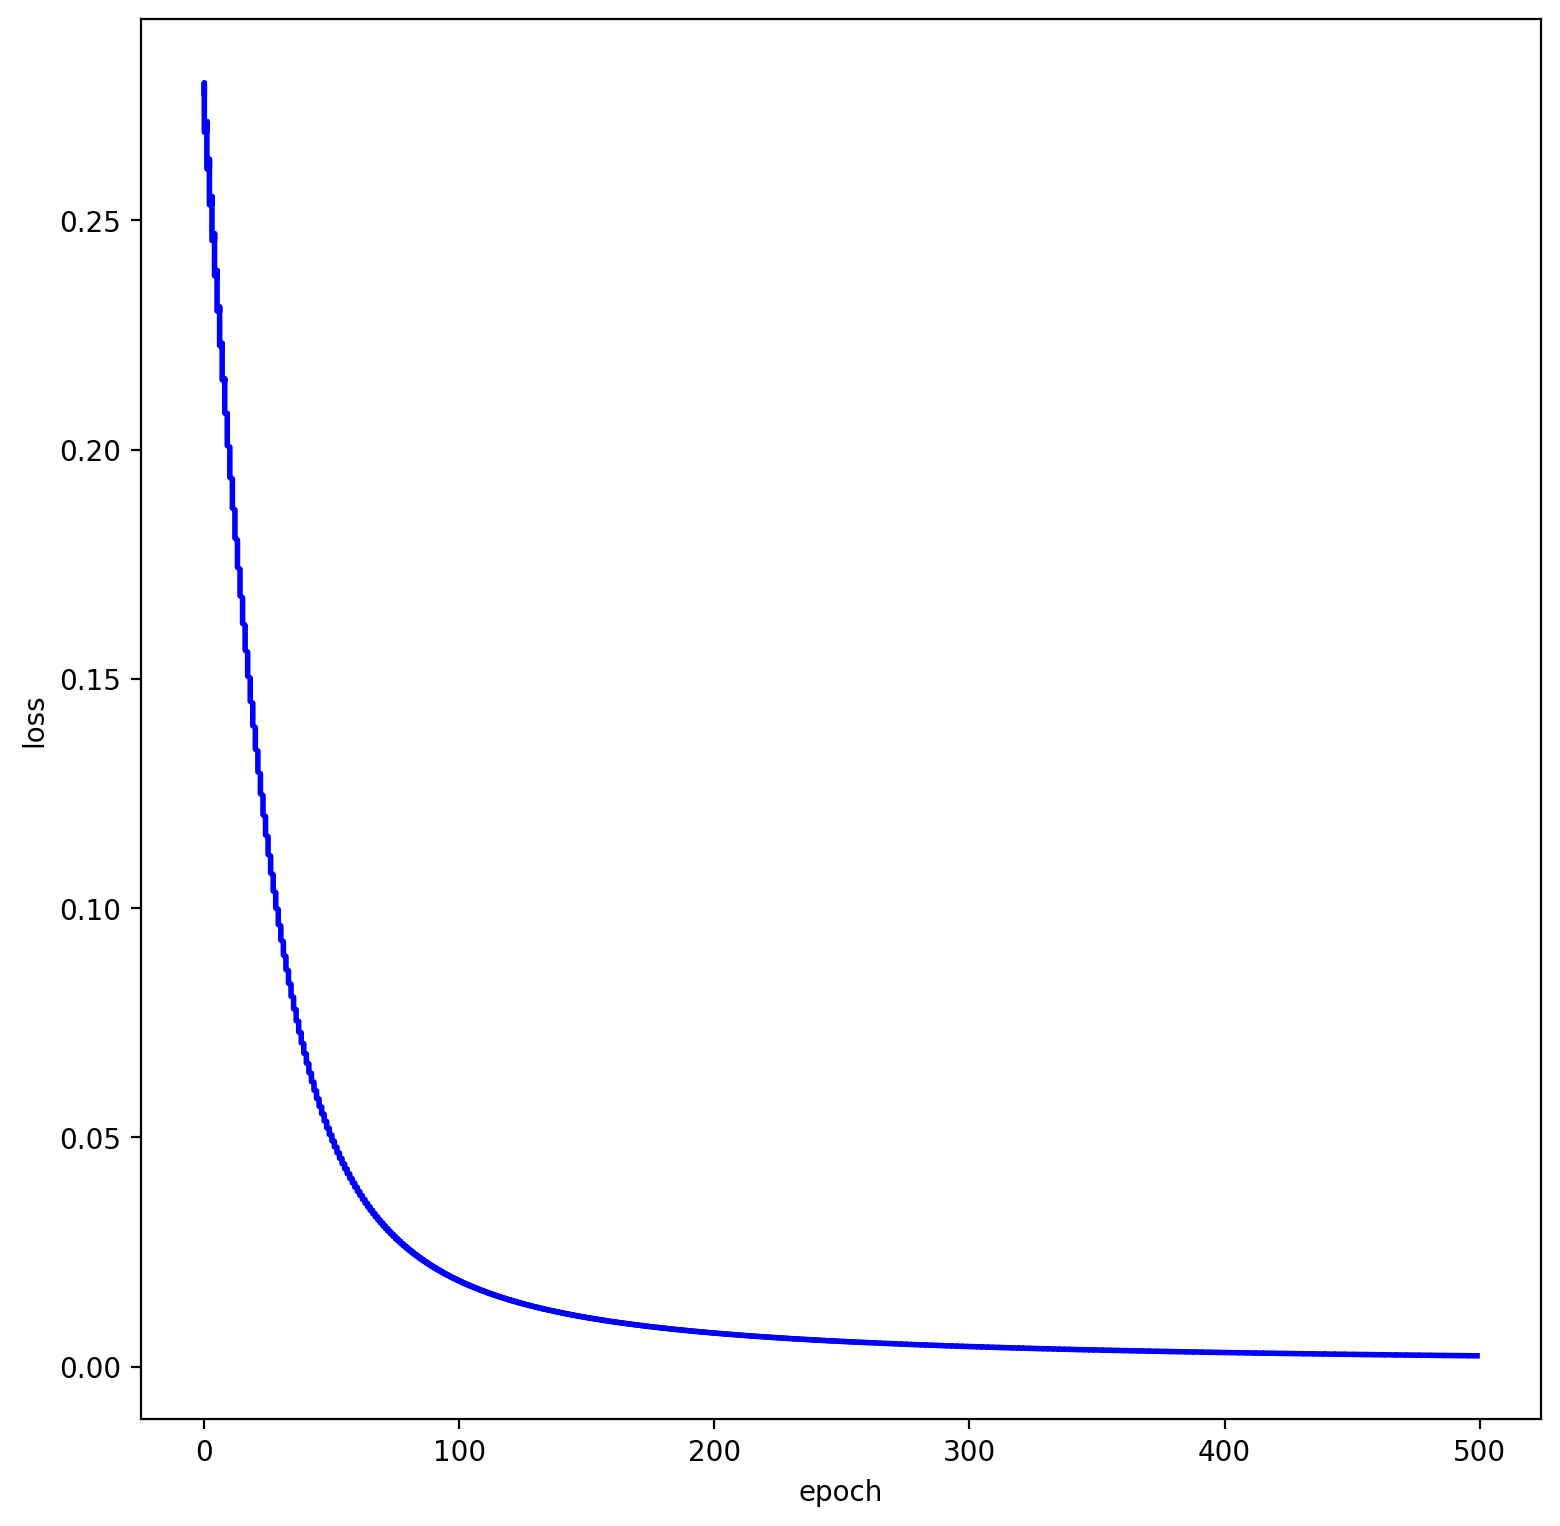

In [1]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'



def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (a11, a12)
    - an output layer with 1 neuron (a2)
  '''
  def __init__(self):
    # Weights
    self.w111 = np.random.normal()
    self.w112 = np.random.normal()
    self.w121 = np.random.normal()
    self.w122 = np.random.normal()
    self.w211 = np.random.normal()
    self.w212 = np.random.normal()

    # Biases
    self.b11 = np.random.normal()
    self.b12 = np.random.normal()
    self.b2 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    a11 = sigmoid(self.w111 * x[0] + self.w112 * x[1] + self.b11)
    a12 = sigmoid(self.w121 * x[0] + self.w122 * x[1] + self.b12)
    a2 = sigmoid(self.w211 * a11 + self.w212 * a12 + self.b2)
    return a2

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
      # number of times to loop through the entire dataset
    epochs = 500 #training is shorter 
    epoch_vector=[]
    loss_vector=[]

    # the gradient descent algorithm
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_a11 = self.w111 * x[0] + self.w112 * x[1] + self.b11
        a11 = sigmoid(sum_a11)

        sum_a12 = self.w121 * x[0] + self.w122 * x[1] + self.b12
        a12 = sigmoid(sum_a12)

        sum_a2 = self.w211 * a11 + self.w212 * a12 + self.b2
        a2 = sigmoid(sum_a2)
        y_pred = a2

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron a2
        d_ypred_d_w211 = a11 * deriv_sigmoid(sum_a2) # dy/dw to know how to change the weights w for a given difference in y
        d_ypred_d_w212 = a12 * deriv_sigmoid(sum_a2)
        d_ypred_d_b2 = deriv_sigmoid(sum_a2)

        d_ypred_d_a11 = self.w211 * deriv_sigmoid(sum_a2)
        d_ypred_d_a12 = self.w212 * deriv_sigmoid(sum_a2)

        # Neuron a11
        d_a11_d_w111 = x[0] * deriv_sigmoid(sum_a11)
        d_a11_d_w112 = x[1] * deriv_sigmoid(sum_a11)
        d_a11_d_b11 = deriv_sigmoid(sum_a11)

        # Neuron a12
        d_a12_d_w121 = x[0] * deriv_sigmoid(sum_a12)
        d_a12_d_w122 = x[1] * deriv_sigmoid(sum_a12)
        d_a12_d_b12 = deriv_sigmoid(sum_a12)

        # --- Update weights and biases
        # Neuron a11
        self.w111 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w111
        self.w112 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w112
        self.b11 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_b11

        # Neuron a12
        self.w121 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w121
        self.w122 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w122
        self.b12 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_b12

        # Neuron a2
        self.w211 -= learn_rate * d_L_d_ypred * d_ypred_d_w211
        self.w212 -= learn_rate * d_L_d_ypred * d_ypred_d_w212
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_b2

      # --- Calculate total loss at the end of each epoch
      #if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        #print("Epoch %d loss: %.3f" % (epoch, loss))
        epoch_vector.append(epoch)
        loss_vector.append(loss)
        
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(epoch_vector,loss_vector, '-b', lw=2)
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    plt.show()
      
    
# Define dataset of period and amplitude
data = np.array([
  [0.9, 0.5],  
  [1.1, 0.55],
  [1.2, 0.65],   
  [1.1, 0.5], 
  [1.0, 0.65], 
  [1.1, 0.45],
  [1.1, 0.75],#6.5
  [10.5, 0.5],
  [13.4, 0.4],
  [11.14, 0.54],
  [11.49, 0.45],
  [13.4, 0.4],    
  [27.2, 0.65],
])
all_y_trues = np.array([
  1, # RRL
  1, # RRL    
  1, # RRL
  1, # RRL  
  1, # RRL    
  1, # RRL
  1, # RRL      
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
])



# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

Here it is evident that the predictions are not great because of the underfitting and the loss be high.

training is longer, epoch = 7000

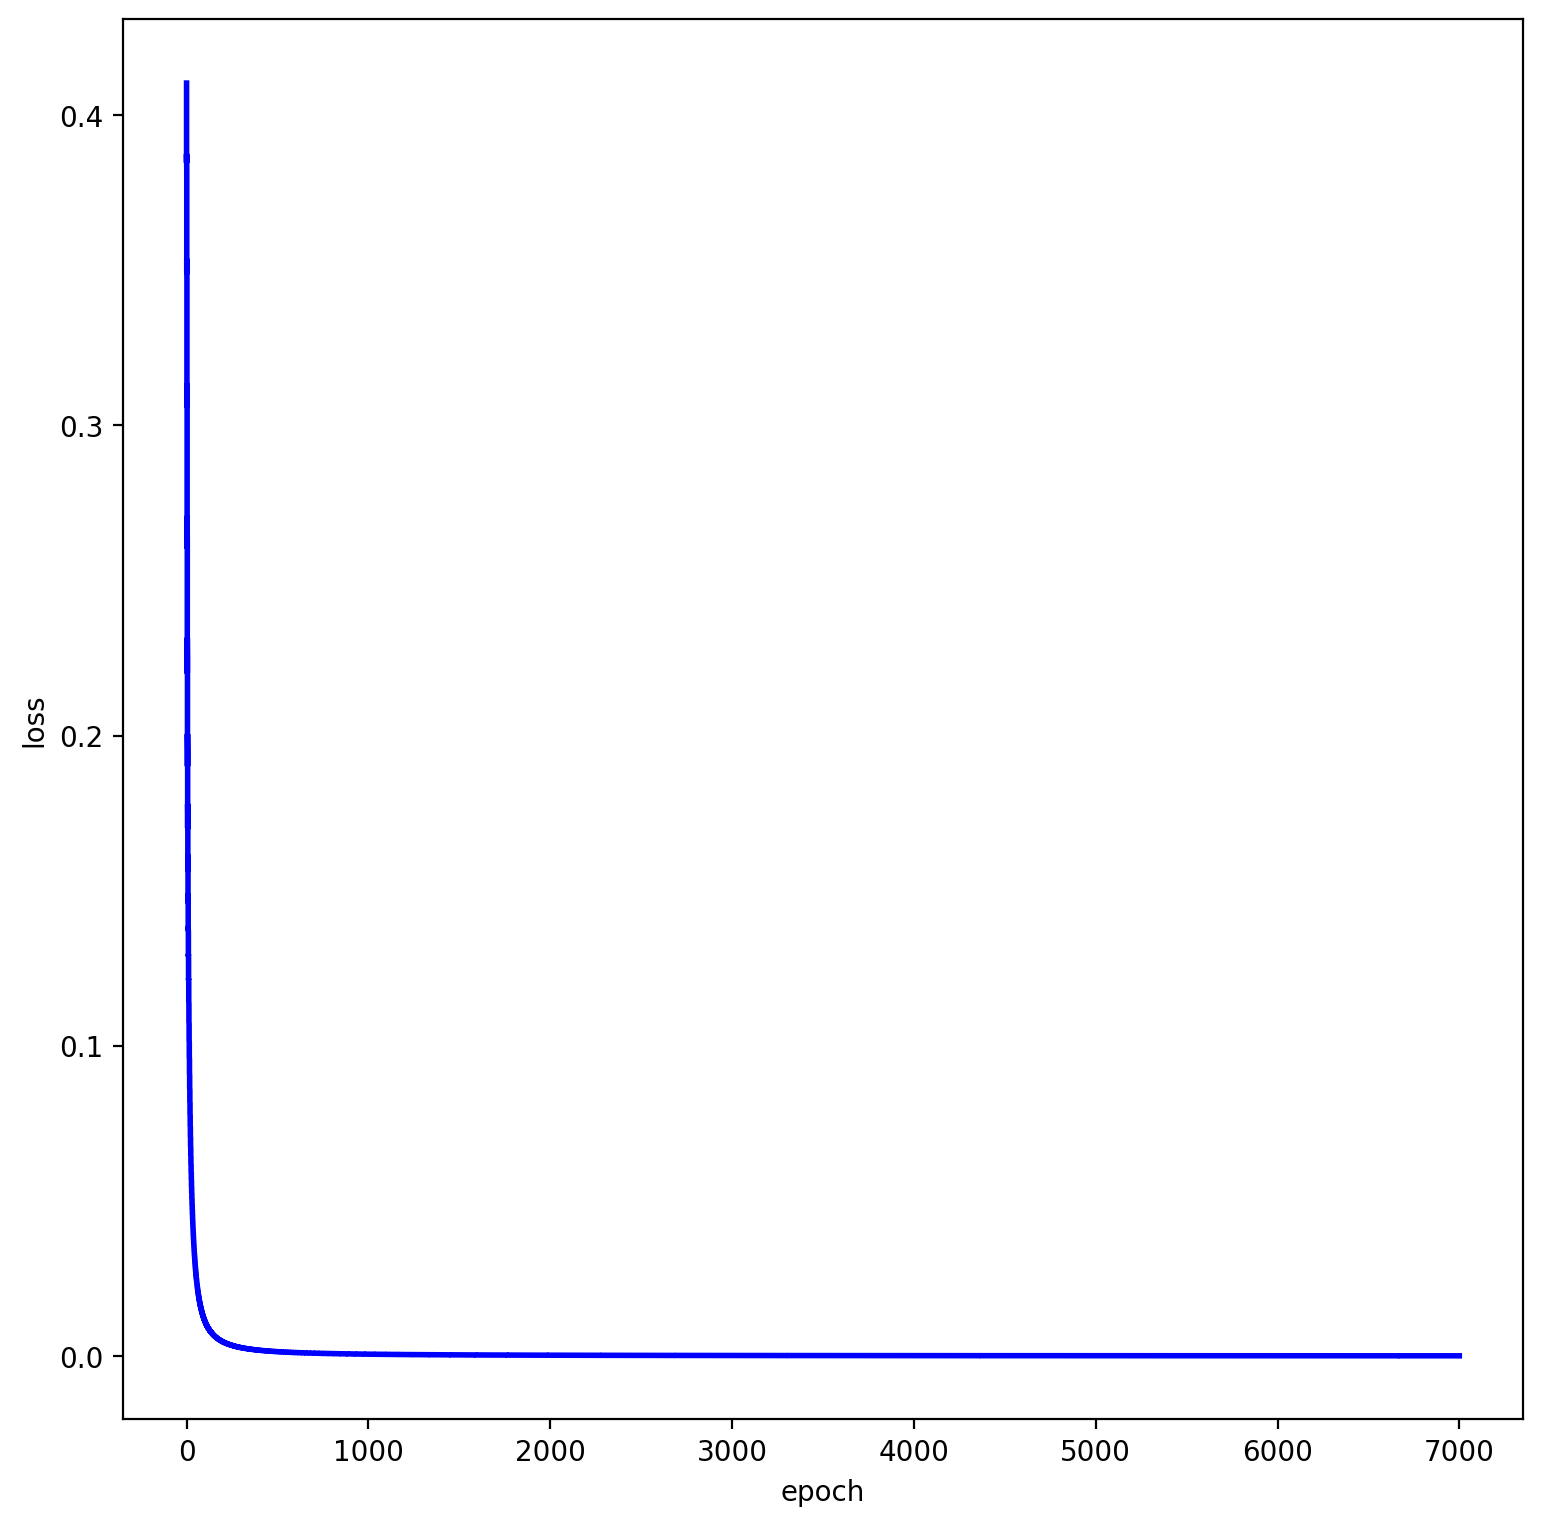

In [2]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'



def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (a11, a12)
    - an output layer with 1 neuron (a2)
  '''
  def __init__(self):
    # Weights
    self.w111 = np.random.normal()
    self.w112 = np.random.normal()
    self.w121 = np.random.normal()
    self.w122 = np.random.normal()
    self.w211 = np.random.normal()
    self.w212 = np.random.normal()

    # Biases
    self.b11 = np.random.normal()
    self.b12 = np.random.normal()
    self.b2 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    a11 = sigmoid(self.w111 * x[0] + self.w112 * x[1] + self.b11)
    a12 = sigmoid(self.w121 * x[0] + self.w122 * x[1] + self.b12)
    a2 = sigmoid(self.w211 * a11 + self.w212 * a12 + self.b2)
    return a2

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
      # number of times to loop through the entire dataset
    epochs = 7000 #training is longer
    epoch_vector=[]
    loss_vector=[]

    # the gradient descent algorithm
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_a11 = self.w111 * x[0] + self.w112 * x[1] + self.b11
        a11 = sigmoid(sum_a11)

        sum_a12 = self.w121 * x[0] + self.w122 * x[1] + self.b12
        a12 = sigmoid(sum_a12)

        sum_a2 = self.w211 * a11 + self.w212 * a12 + self.b2
        a2 = sigmoid(sum_a2)
        y_pred = a2

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron a2
        d_ypred_d_w211 = a11 * deriv_sigmoid(sum_a2) # dy/dw to know how to change the weights w for a given difference in y
        d_ypred_d_w212 = a12 * deriv_sigmoid(sum_a2)
        d_ypred_d_b2 = deriv_sigmoid(sum_a2)

        d_ypred_d_a11 = self.w211 * deriv_sigmoid(sum_a2)
        d_ypred_d_a12 = self.w212 * deriv_sigmoid(sum_a2)

        # Neuron a11
        d_a11_d_w111 = x[0] * deriv_sigmoid(sum_a11)
        d_a11_d_w112 = x[1] * deriv_sigmoid(sum_a11)
        d_a11_d_b11 = deriv_sigmoid(sum_a11)

        # Neuron a12
        d_a12_d_w121 = x[0] * deriv_sigmoid(sum_a12)
        d_a12_d_w122 = x[1] * deriv_sigmoid(sum_a12)
        d_a12_d_b12 = deriv_sigmoid(sum_a12)

        # --- Update weights and biases
        # Neuron a11
        self.w111 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w111
        self.w112 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w112
        self.b11 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_b11

        # Neuron a12
        self.w121 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w121
        self.w122 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w122
        self.b12 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_b12

        # Neuron a2
        self.w211 -= learn_rate * d_L_d_ypred * d_ypred_d_w211
        self.w212 -= learn_rate * d_L_d_ypred * d_ypred_d_w212
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_b2

      # --- Calculate total loss at the end of each epoch
      #if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        #print("Epoch %d loss: %.3f" % (epoch, loss))
        epoch_vector.append(epoch)
        loss_vector.append(loss)
        
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(epoch_vector,loss_vector, '-b', lw=2)
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    plt.show()
      
    
# Define dataset of period and amplitude
data = np.array([
  [0.9, 0.5],  
  [1.1, 0.55],
  [1.2, 0.65],   
  [1.1, 0.5], 
  [1.0, 0.65], 
  [1.1, 0.45],
  [1.1, 0.75],#6.5
  [10.5, 0.5],
  [13.4, 0.4],
  [11.14, 0.54],
  [11.49, 0.45],
  [13.4, 0.4],    
  [27.2, 0.65],
])
all_y_trues = np.array([
  1, # RRL
  1, # RRL    
  1, # RRL
  1, # RRL  
  1, # RRL    
  1, # RRL
  1, # RRL      
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
])



# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

By looking into the loss curve, its clear that network learns better, but eventually the loss stopped improving. Too long caused the overfitting (memorizing training set instead of generalizing).

3. Modify the activation function 
  

 Replacing sigmoid with tanh

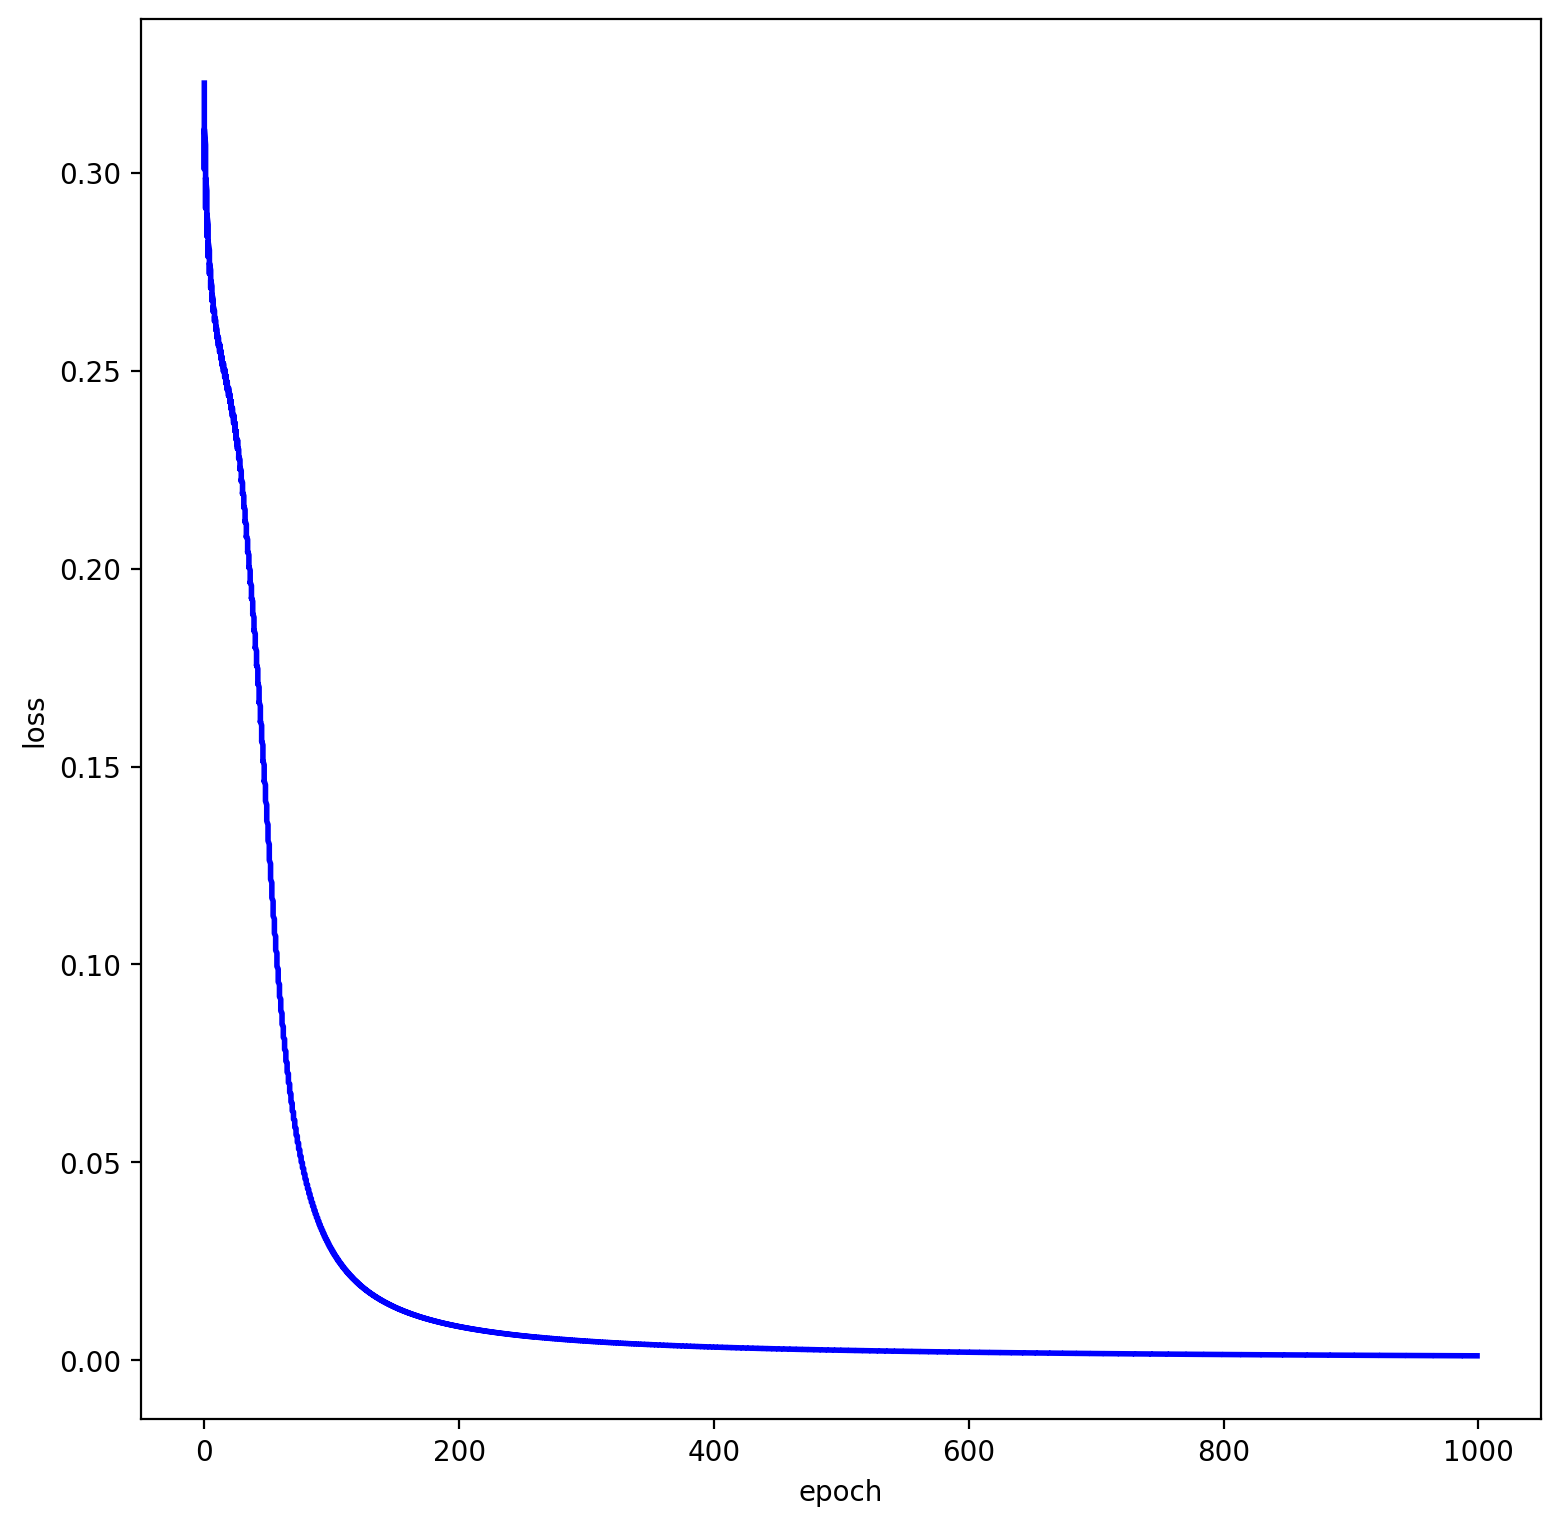

In [27]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'



def tanh(x):
    return np.tanh(x)

def deriv_tanh(x):
    return 1 - np.tanh(x)**2

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (a11, a12)
    - an output layer with 1 neuron (a2)
  '''
  def __init__(self):
    # Weights
    self.w111 = np.random.normal()
    self.w112 = np.random.normal()
    self.w121 = np.random.normal()
    self.w122 = np.random.normal()
    self.w211 = np.random.normal()
    self.w212 = np.random.normal()

    # Biases
    self.b11 = np.random.normal()
    self.b12 = np.random.normal()
    self.b2 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    a11 = sigmoid(self.w111 * x[0] + self.w112 * x[1] + self.b11)
    a12 = sigmoid(self.w121 * x[0] + self.w122 * x[1] + self.b12)
    a2 = sigmoid(self.w211 * a11 + self.w212 * a12 + self.b2)
    return a2

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset
    epoch_vector=[]
    loss_vector=[]

    # the gradient descent algorithm
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_a11 = self.w111 * x[0] + self.w112 * x[1] + self.b11
        a11 = sigmoid(sum_a11)

        sum_a12 = self.w121 * x[0] + self.w122 * x[1] + self.b12
        a12 = sigmoid(sum_a12)

        sum_a2 = self.w211 * a11 + self.w212 * a12 + self.b2
        a2 = sigmoid(sum_a2)
        y_pred = a2

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron a2
        d_ypred_d_w211 = a11 * deriv_sigmoid(sum_a2) # dy/dw to know how to change the weights w for a given difference in y
        d_ypred_d_w212 = a12 * deriv_sigmoid(sum_a2)
        d_ypred_d_b2 = deriv_sigmoid(sum_a2)

        d_ypred_d_a11 = self.w211 * deriv_sigmoid(sum_a2)
        d_ypred_d_a12 = self.w212 * deriv_sigmoid(sum_a2)

        # Neuron a11
        d_a11_d_w111 = x[0] * deriv_sigmoid(sum_a11)
        d_a11_d_w112 = x[1] * deriv_sigmoid(sum_a11)
        d_a11_d_b11 = deriv_sigmoid(sum_a11)

        # Neuron a12
        d_a12_d_w121 = x[0] * deriv_sigmoid(sum_a12)
        d_a12_d_w122 = x[1] * deriv_sigmoid(sum_a12)
        d_a12_d_b12 = deriv_sigmoid(sum_a12)

        # --- Update weights and biases
        # Neuron a11
        self.w111 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w111
        self.w112 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w112
        self.b11 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_b11

        # Neuron a12
        self.w121 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w121
        self.w122 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w122
        self.b12 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_b12

        # Neuron a2
        self.w211 -= learn_rate * d_L_d_ypred * d_ypred_d_w211
        self.w212 -= learn_rate * d_L_d_ypred * d_ypred_d_w212
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_b2

      # --- Calculate total loss at the end of each epoch
      #if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        #print("Epoch %d loss: %.3f" % (epoch, loss))
        epoch_vector.append(epoch)
        loss_vector.append(loss)
        
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(epoch_vector,loss_vector, '-b', lw=2)
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    plt.show()
      
    
# Define dataset of period and amplitude
data = np.array([
  [0.9, 0.5],  
  [1.1, 0.55],
  [1.2, 0.65],   
  [1.1, 0.5], 
  [1.0, 0.65], 
  [1.1, 0.45],
  [1.1, 0.75],#6.5
  [10.5, 0.5],
  [13.4, 0.4],
  [11.14, 0.54],
  [11.49, 0.45],
  [13.4, 0.4],    
  [27.2, 0.65],
])
all_y_trues = np.array([
  1, # RRL
  1, # RRL    
  1, # RRL
  1, # RRL  
  1, # RRL    
  1, # RRL
  1, # RRL      
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
])



# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

 Replacing sigmoid with ReLU

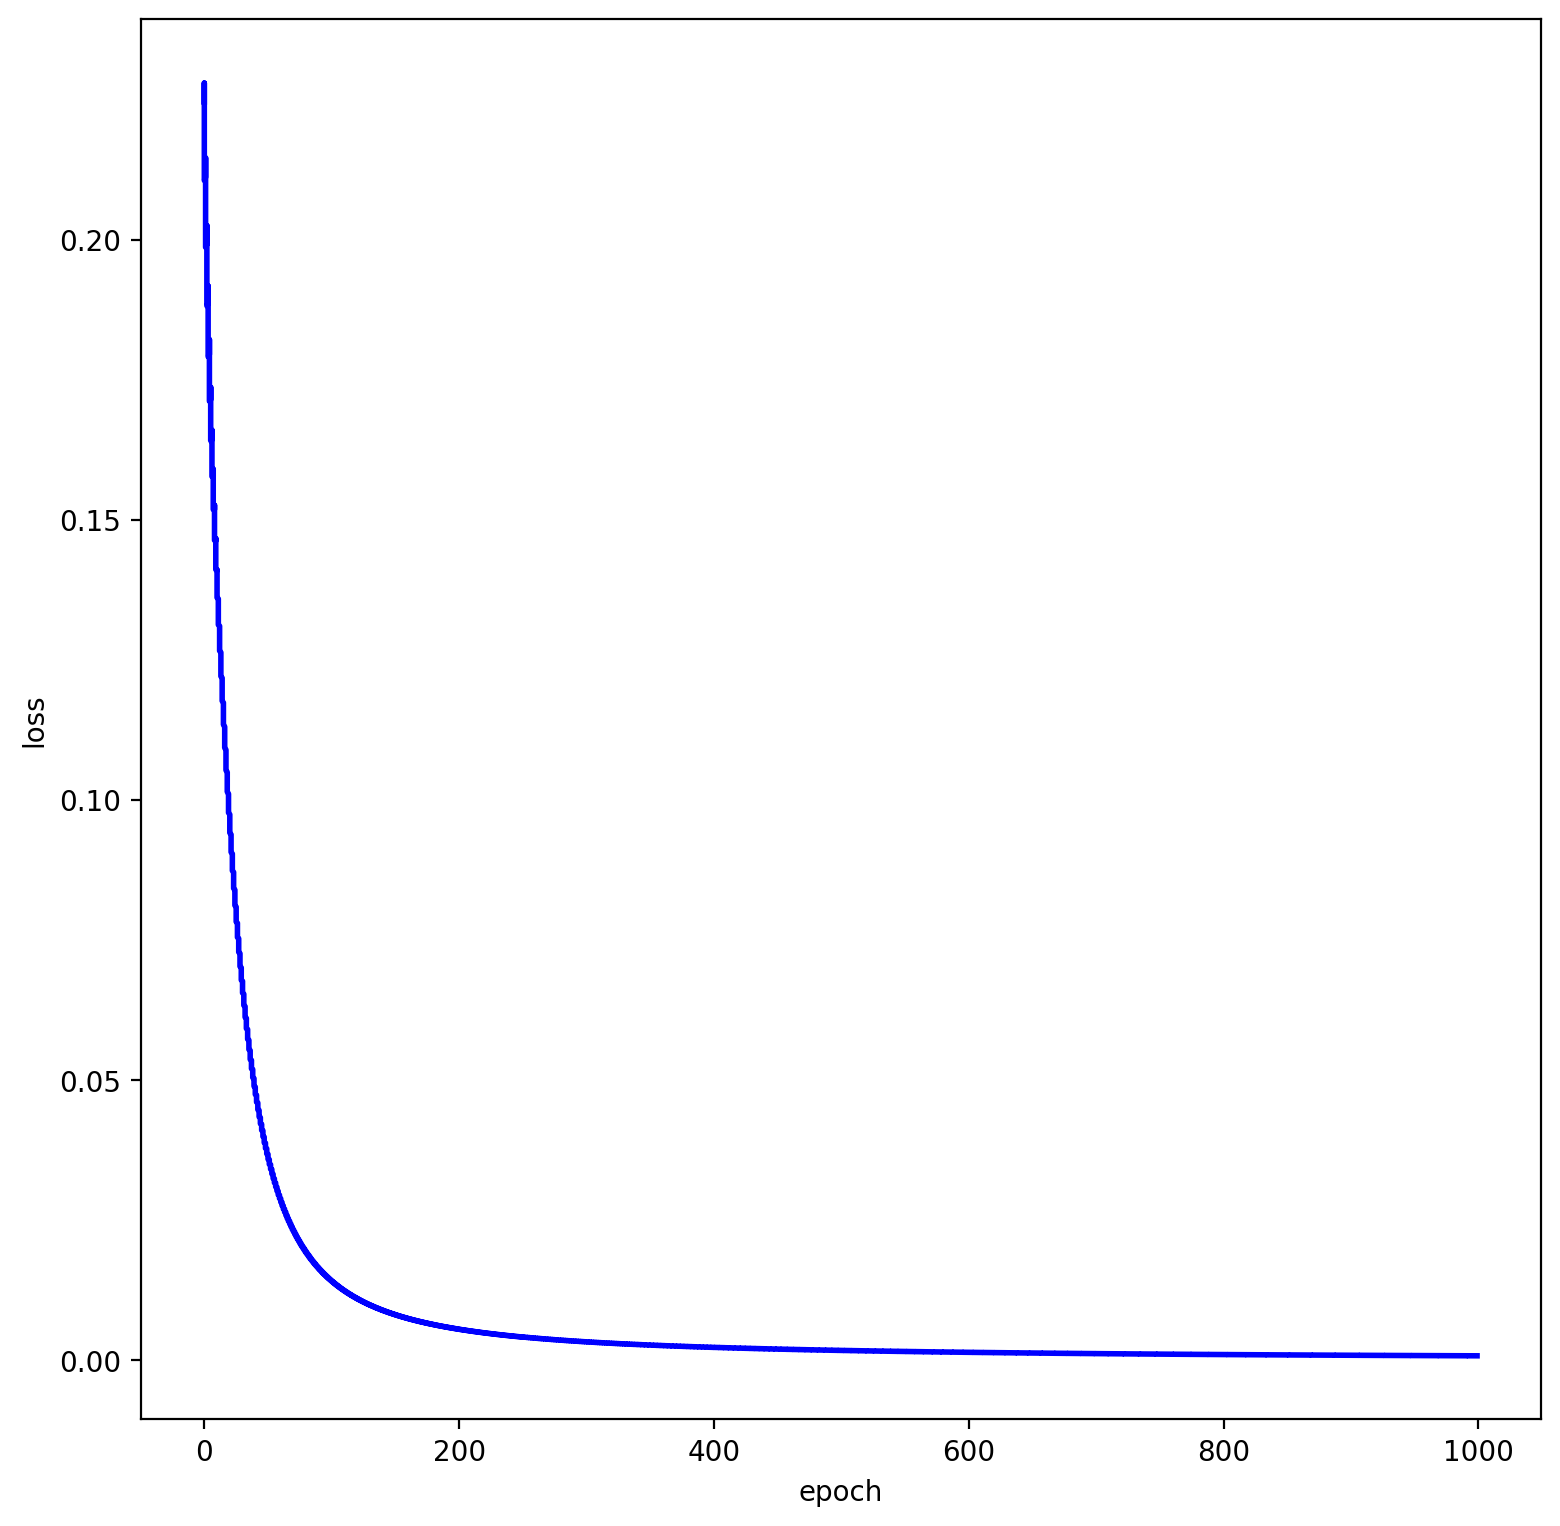

In [29]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'



def relu(x):
    return np.maximum(0, x)

def deriv_relu(x):
    return 1.0 * (x > 0)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:
  '''
  A neural network with:
    - 2 inputs
    - a hidden layer with 2 neurons (a11, a12)
    - an output layer with 1 neuron (a2)
  '''
  def __init__(self):
    # Weights
    self.w111 = np.random.normal()
    self.w112 = np.random.normal()
    self.w121 = np.random.normal()
    self.w122 = np.random.normal()
    self.w211 = np.random.normal()
    self.w212 = np.random.normal()

    # Biases
    self.b11 = np.random.normal()
    self.b12 = np.random.normal()
    self.b2 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    a11 = sigmoid(self.w111 * x[0] + self.w112 * x[1] + self.b11)
    a12 = sigmoid(self.w121 * x[0] + self.w122 * x[1] + self.b12)
    a2 = sigmoid(self.w211 * a11 + self.w212 * a12 + self.b2)
    return a2

  def train(self, data, all_y_trues):
    '''
    - data is a (n x 2) numpy array, n = # of samples in the dataset.
    - all_y_trues is a numpy array with n elements.
      Elements in all_y_trues correspond to those in data.
    '''
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset
    epoch_vector=[]
    loss_vector=[]

    # the gradient descent algorithm
    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_a11 = self.w111 * x[0] + self.w112 * x[1] + self.b11
        a11 = sigmoid(sum_a11)

        sum_a12 = self.w121 * x[0] + self.w122 * x[1] + self.b12
        a12 = sigmoid(sum_a12)

        sum_a2 = self.w211 * a11 + self.w212 * a12 + self.b2
        a2 = sigmoid(sum_a2)
        y_pred = a2

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron a2
        d_ypred_d_w211 = a11 * deriv_sigmoid(sum_a2) # dy/dw to know how to change the weights w for a given difference in y
        d_ypred_d_w212 = a12 * deriv_sigmoid(sum_a2)
        d_ypred_d_b2 = deriv_sigmoid(sum_a2)

        d_ypred_d_a11 = self.w211 * deriv_sigmoid(sum_a2)
        d_ypred_d_a12 = self.w212 * deriv_sigmoid(sum_a2)

        # Neuron a11
        d_a11_d_w111 = x[0] * deriv_sigmoid(sum_a11)
        d_a11_d_w112 = x[1] * deriv_sigmoid(sum_a11)
        d_a11_d_b11 = deriv_sigmoid(sum_a11)

        # Neuron a12
        d_a12_d_w121 = x[0] * deriv_sigmoid(sum_a12)
        d_a12_d_w122 = x[1] * deriv_sigmoid(sum_a12)
        d_a12_d_b12 = deriv_sigmoid(sum_a12)

        # --- Update weights and biases
        # Neuron a11
        self.w111 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w111
        self.w112 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_w112
        self.b11 -= learn_rate * d_L_d_ypred * d_ypred_d_a11 * d_a11_d_b11

        # Neuron a12
        self.w121 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w121
        self.w122 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_w122
        self.b12 -= learn_rate * d_L_d_ypred * d_ypred_d_a12 * d_a12_d_b12

        # Neuron a2
        self.w211 -= learn_rate * d_L_d_ypred * d_ypred_d_w211
        self.w212 -= learn_rate * d_L_d_ypred * d_ypred_d_w212
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_b2

      # --- Calculate total loss at the end of each epoch
      #if epoch % 10 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        #print("Epoch %d loss: %.3f" % (epoch, loss))
        epoch_vector.append(epoch)
        loss_vector.append(loss)
        
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_axes([0,0,1,1])
    ax.plot(epoch_vector,loss_vector, '-b', lw=2)
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    plt.show()
      
    
# Define dataset of period and amplitude
data = np.array([
  [0.9, 0.5],  
  [1.1, 0.55],
  [1.2, 0.65],   
  [1.1, 0.5], 
  [1.0, 0.65], 
  [1.1, 0.45],
  [1.1, 0.75],#6.5
  [10.5, 0.5],
  [13.4, 0.4],
  [11.14, 0.54],
  [11.49, 0.45],
  [13.4, 0.4],    
  [27.2, 0.65],
])
all_y_trues = np.array([
  1, # RRL
  1, # RRL    
  1, # RRL
  1, # RRL  
  1, # RRL    
  1, # RRL
  1, # RRL      
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
  0, # Cepheid
])



# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)